# Working with Data, Part I

## Goals
+ Load and plot raw data
+ filter data
+ manually extract spikes
+ plot mean spike waveform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

Bo.Python.Practice.ipynb          LICENSE
code_of_conduct.md                planning.org
Code Snippets - Max.ipynb         README.md
HVC_sample.dat                    Untitled1.ipynb
Intro to Python.ipynb             Untitled.ipynb
Lesson 1 - Into to Python.ipynb   Working with Data, Part I.ipynb
Lesson.1.-.Intro.to.Python.ipynb


In [3]:
raw = np.fromfile("HVC_sample.dat", "<i2")

In [6]:
sampling_rate = 30000
t = np.arange(len(raw)) / sampling_rate
uV_conversion = 0.195
uv_raw = raw * uV_conversion

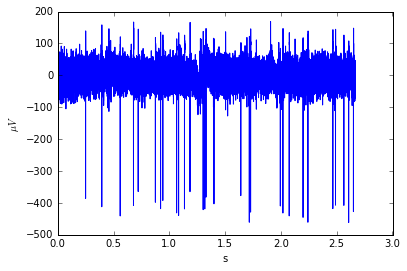

In [12]:
plt.plot(t, uv_raw)
plt.ylabel(r"$\mu V$")
plt.xlabel("s")

In [13]:
from scipy.signal import argrelmin

In [19]:
thresh_mask = uv_raw < -250

In [20]:
thresh_only = np.zeros_like(uv_raw)
thresh_only[thresh_mask] = uv_raw[thresh_mask]


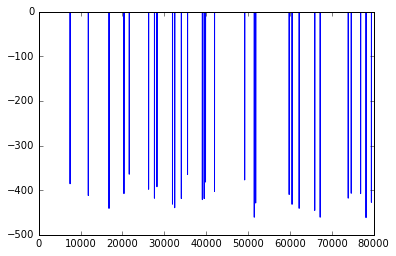

In [21]:
plt.plot(thresh_only)

In [26]:
spike_samples = argrelmin(thresh_only)[0]

In [27]:
spike_times = spike_samples / sampling_rate

In [28]:
spike_peaks = uv_raw[spike_samples]

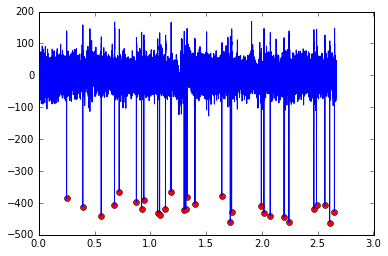

In [31]:
plt.plot(spike_times, spike_peaks, 'or')
plt.plot(t, uv_raw)

In [33]:
from scipy.signal import cheby2, filtfilt

In [34]:
cheby2?

In [124]:
lfp_b, lfp_a = cheby2(3, 8, 300/2/sampling_rate, btype="low")

In [125]:
lfp = filtfilt(lfp_b, lfp_a, uv_raw)

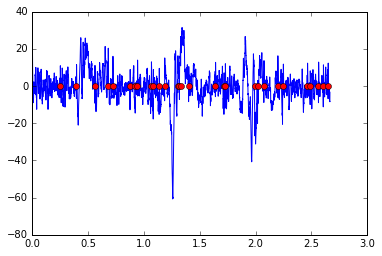

In [126]:
plt.plot(t, lfp)
plt.plot(spike_times, np.zeros_like(spike_times), "or")

 This isn't working well because the data acquistion had a high pass filter at around 250Hz, but you get the idea. Also spikes DO contaminate LFP in general.

## Spike statistics

In [129]:
mean_firing_rate = sum(spike_times) / t[-1]
print(mean_firing_rate)

16.3330166627


In [131]:
ISI = np.diff(spike_times)

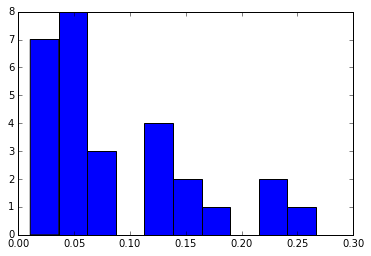

In [133]:
plt.hist(ISI);